### A test example for clustering and regularized logistic regression

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import tensorflow as tf

The goal is to find decision boundary on the test points in below:

In [2]:
file_2_read = os.path.join(os.getcwd(), 'machine-learning-ex2/ex2/ex2data1.txt')

data_raw = pd.read_csv(file_2_read, header=None, 
                       names=['test1', 'test2', 'acpt'])

X = np.transpose(np.array([data_raw['test1'], data_raw['test2']]))
size_ = np.shape(X)[0]
y = np.reshape(np.array(data_raw['acpt']), [size_,1])


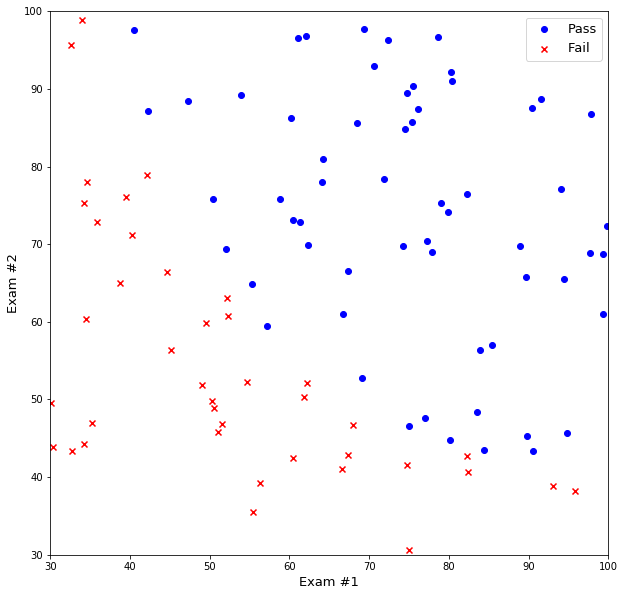

In [3]:
pass_array = np.where(y==1)[0]
fail_array = np.where(y==0)[0]

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(X[pass_array,0], X[pass_array,1], marker = 'o', c='b', label='Pass')

plt.scatter(X[fail_array,0], X[fail_array,1], marker = 'x', c='r', label='Fail')

plt.axis([30,100,30,100])
plt.legend(fontsize='13')

plt.ylabel('Exam #2', fontsize = '13')
plt.xlabel('Exam #1', fontsize = '13')


plt.show()

- First, let's define our normalizing function:

In [4]:
def normalize_features(features):
    
    mu = np.average(features, axis=0)
    
    std = np.std(features, axis=0)
    
    features_ = (features-mu)/std
    
    return mu, std, features_


- Now, feed feature vectors to the normilizer funtion. This will make training converge much faster

In [5]:
mu_, std_, X_normal = normalize_features(X)

- add bias term to the features. Think of y=XW+b being written as y=[1 X]W', where W (or W') are our optimization variables

In [6]:
def add_bias(features):
    
    size = features.shape[0]
    
    new_array = np.c_[np.ones(size), features]
    
    return new_array
    
X_biased = add_bias(X_normal)

In [8]:
#config

tf.reset_default_graph()
learning_rate = 0.03
training_epochs = 20000
logs_path = os.path.join(os.getcwd(),'linear')

In [10]:
sample_n, params_n = np.shape(X_biased)


y_ = tf.placeholder(tf.float64, [None, 1])
X_ = tf.placeholder(tf.float64, [None, params_n])
W = tf.Variable(np.zeros((params_n,1)))

h_ = tf.sigmoid(tf.matmul(X_,W))

cost = tf.reduce_mean(tf.multiply(-y_,tf.log(h_))-
                      tf.multiply(1-y_,tf.log(1-h_)))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

cost_history = []
    

In [11]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={X_:X_biased, y_:y})
    cost_value = sess.run(cost, feed_dict={X_:X_biased, y_:y})
    cost_history.append(cost_value)

weights = sess.run(W)
sess.close()

- let's plot objective function 

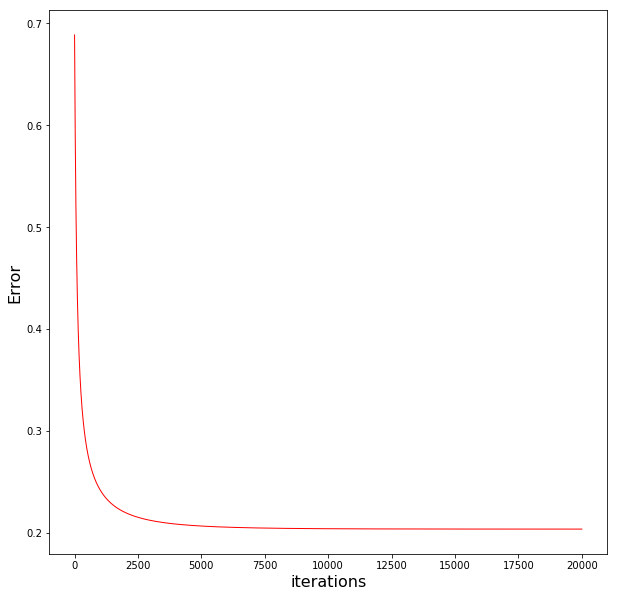

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

plt.xlabel('iterations',fontsize=16)
plt.ylabel('Error', fontsize=16)

plt.plot(range(training_epochs), cost_history, color='red',linewidth=1)

plt.show()

- now, let's plot desicion boundary from the trained model:

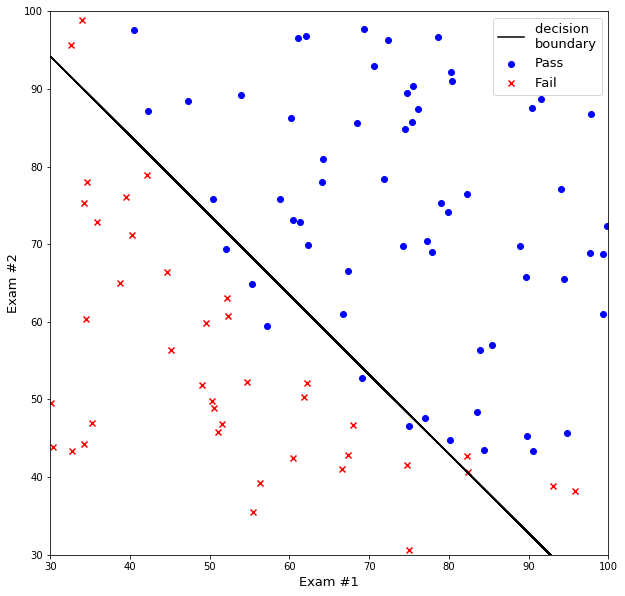

In [13]:
pass_array = np.where(y==1)[0]
fail_array = np.where(y==0)[0]


fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(X[pass_array,0], X[pass_array,1], marker = 'o', c='b', label='Pass')

plt.scatter(X[fail_array,0], X[fail_array,1], marker = 'x', c='r', label='Fail')

X1_un_feature = X_normal[:,0]*std_[0]+mu_[0]
X2_un_feature = (-(weights[0]+weights[1]*X_normal[:,0])/weights[2])*std_[1]+mu_[1]

plt.plot(X1_un_feature, X2_un_feature, c='k', label='decision \nboundary')

plt.axis([30,100,30,100])
plt.legend(fontsize='13')

plt.ylabel('Exam #2', fontsize = '13')
plt.xlabel('Exam #1', fontsize = '13')


plt.show()

## Regularized Regression

- Our goal is to train a model on the set of data that cannot be represented using a linear model. Let's look at the data

In [14]:
file_2_read = os.path.join(os.getcwd(), 'machine-learning-ex2/ex2/ex2data2.txt')

data_raw = pd.read_csv(file_2_read, header=None, 
                       names=['test1', 'test2', 'acpt'])

X = np.transpose(np.array([data_raw['test1'], data_raw['test2']]))
size_ = np.shape(X)[0]
y = np.reshape(np.array(data_raw['acpt']), [size_,1])


mu_, std_, X_normal = normalize_features(X)

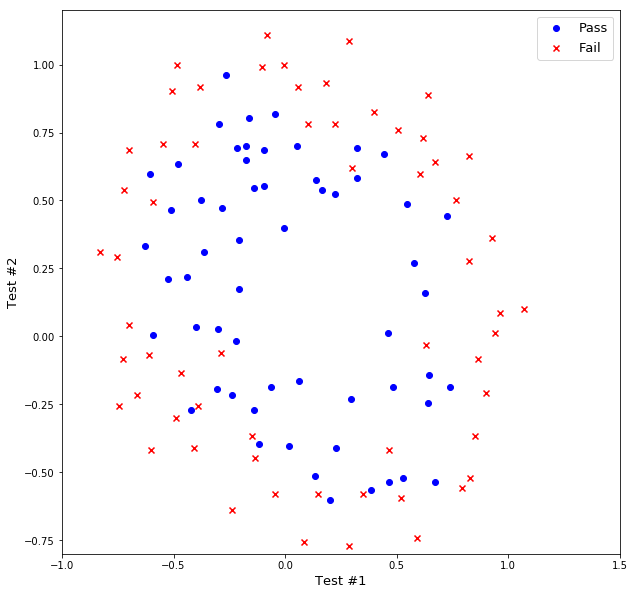

In [15]:
pass_array = np.where(y==1)[0]
fail_array = np.where(y==0)[0]

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(X[pass_array,0], X[pass_array,1], marker = 'o', c='b', label='Pass')

plt.scatter(X[fail_array,0], X[fail_array,1], marker = 'x', c='r', label='Fail')

plt.axis([-1, 1.5,-0.8, 1.2])
plt.legend(fontsize='13')

plt.ylabel('Test #2', fontsize = '13')
plt.xlabel('Test #1', fontsize = '13')

plt.show()

- Let's exapnd our data to the 6th order of each test. Note that you first need to normalize your features and then expand.

In [16]:
def map_feature(x1, x2, order):
    size_1 = x1.shape[0]
    size_2 = (order+1)*(order+2)/2
    features = np.empty([size_1, size_2])
    n=0
    for i in range(order+1):
        for j in range(order+1-i):
            features[:,n]= np.reshape(np.multiply(np.power(x1,i), np.power(x2,j)), (size_1,))
            n+=1
    
    return features

X_mapped = map_feature(X_normal[:,0], X_normal[:,1], 6)

/home/majid/applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [17]:
#config

tf.reset_default_graph()
L1 = 1.0 #regularization parameter
learning_rate = 0.3
training_epochs = 5000
logs_path = os.path.join(os.getcwd(),'board')

In [18]:
sample_n, params_n = np.shape(X_mapped)
 

with tf.name_scope('Input'):
    y_ = tf.placeholder(tf.float64, [None, 1], name='y_input')
    X_ = tf.placeholder(tf.float64, [None, params_n], name='x_input')

with tf.name_scope('Weights'):
    W = tf.Variable(np.zeros((params_n,1)), name='weight')

with tf.name_scope('Sigmoid'):
    h_ = tf.sigmoid(tf.matmul(X_,W))

with tf.name_scope('Cost_fn'):
    cost = tf.reduce_mean(tf.multiply(-y_,tf.log(h_))-tf.multiply(1-y_,tf.log(1-h_)))+0.5*L1*tf.reduce_mean(tf.square(W[1:]))
    
    tf.summary.scalar('cost', cost)
    
with tf.name_scope('Train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
with tf.name_scope('Accuracy'):
    prediction = tf.sigmoid(tf.matmul(X_, W))
    y_pred_pf = tf.greater_equal(prediction, 0.5)
    y_pred_pf_float = tf.cast(y_pred_pf, tf.float64)
    y_compare = tf.cast(tf.equal(y_, y_pred_pf_float), tf.float64)
    accuracy = tf.reduce_mean(y_compare)
    tf.summary.scalar('accuracy', accuracy)

cost_history = []
summ = tf.summary.merge_all()
    

In [19]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter(logs_path)
writer.add_graph(sess.graph)

for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={X_:X_mapped, y_:y})
    cost_value = sess.run(cost, feed_dict={X_:X_mapped, y_:y})
    cost_history.append(cost_value)
    
    if epoch%10 == 0:
        _, _, s = sess.run([cost, accuracy, summ], feed_dict={X_:X_mapped, y_:y})
        writer.add_summary(s, epoch)

weights = sess.run(W)
sess.close()

- cost function plot

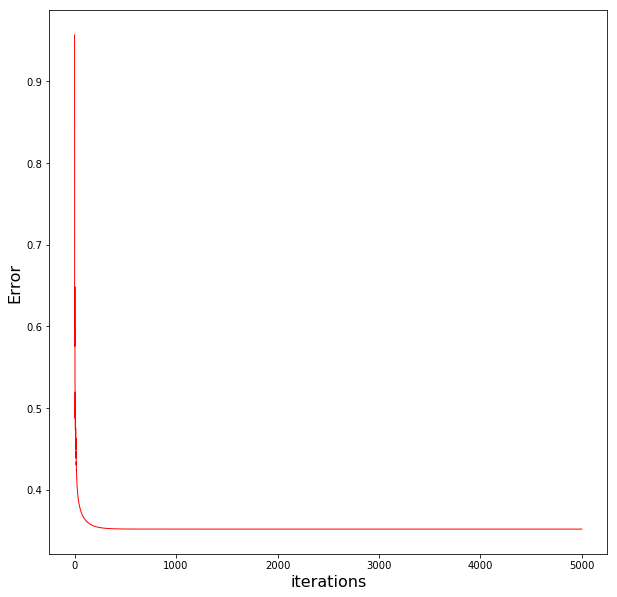

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

plt.xlabel('iterations',fontsize=16)
plt.ylabel('Error', fontsize=16)

plt.plot(range(training_epochs), cost_history, color='red',linewidth=1)

plt.show()

- Desicion boundary plot. Since X2 cannot be explicitly obtained vs. X1, we mesh the plane and draw the countor plot

In [21]:
from numba.decorators import autojit
from scipy.special import expit


X2_test = np.arange(1.2, -0.8, -0.01)
X1_test = np.arange(-1.0, 1.5, 0.01)


X1_test_normal = (X1_test-mu_[0])/std_[0]
X2_test_normal = (X2_test-mu_[1])/std_[1]
Z = np.zeros([X2_test.shape[0], X1_test.shape[0]])


@autojit
def Z_calculate(X1_tn, X2_tn, Z):
    
    i = 0
    for x2 in X2_tn:
        j=0
        for x1 in X1_tn:
            maped_x1_x2 = map_feature(np.array([x1]),np.array([x2]),6)
            h_teta = expit(np.matmul(maped_x1_x2, weights))
            Z[i,j] = h_teta>=0.5
            j+=1
        i+=1
    return Z

Z_ = Z_calculate(X1_test_normal, X2_test_normal, Z)

/home/majid/applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


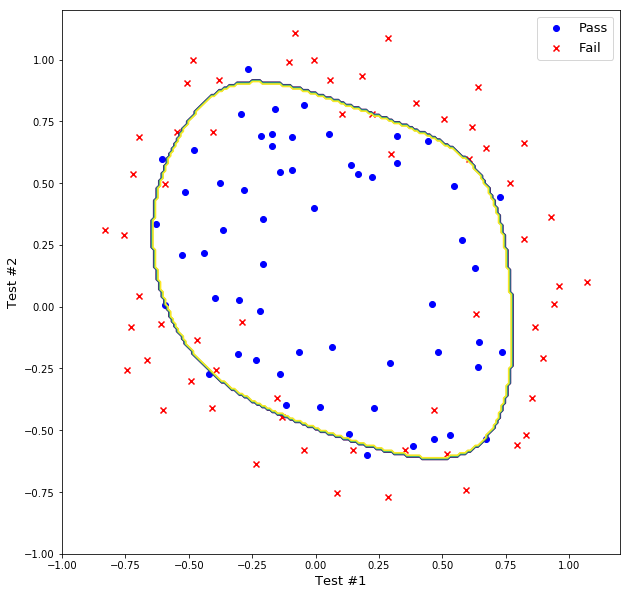

In [25]:
pass_array = np.where(y==1)[0]
fail_array = np.where(y==0)[0]

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(X[pass_array,0], X[pass_array,1], marker = 'o', c='b', label='Pass')

plt.scatter(X[fail_array,0], X[fail_array,1], marker = 'x', c='r', label='Fail')

plt.contour(X1_test, X2_test, Z)

plt.axis([-1, 1.2,-1.0, 1.2])
plt.legend(fontsize='13')

plt.ylabel('Test #2', fontsize = '13')
plt.xlabel('Test #1', fontsize = '13')


plt.show()

<img src='./board.png'>

In [ ]:
a = ['a', 'b', 'c', 'b']

b = pd.DataFrame(a)

b.apply(lambda x: x=='b')

### Notes:

- normalizing parameters before training is essential for quick convergance 

- when classifier is trained, any test point has to first be normalized then fed to the class

Logostoc Regression with Tensorflow 

https://www.tensorflow.org/api_docs/python/tf/contrib/learn/LinearClassifier

https://www.tensorflow.org/tutorials/wide

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/learn/wide_n_deep_tutorial.py

https://www.tensorflow.org/get_started/monitors